<a href="https://colab.research.google.com/github/Deykoz/Machine-Learning-projects/blob/main/CNN%20for%20classification%20of%20image/TensorFlow_DL_CNN_Cifar_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **CNN for classification of image**

In this project, I will implement a basic Convolutional Neural Network (CNN) for image classification using the CIFAR-10 dataset. CIFAR-10 is a widely-used dataset containing 60,000 color images across 10 different classes, including categories like airplanes, cars, and animals. The goal of this project is to design a simple yet effective CNN model to classify these images. Through this, I aim to explore the fundamental concepts of deep learning, such as convolutional layers, pooling, and activation functions, while also gaining insight into the process of training and evaluating a neural network for real-world image classification tasks.

In [ ]:
import tensorflow as tf
from tensorflow import keras

(train_images, train_labels), (test_images, test_labels) = keras.datasets.cifar10.load_data()

print("train images shape : ",train_images.shape)
print("train labels shape : ",train_labels.shape)
print("test images shape : ",test_images.shape)
print("test labels shape : ",test_labels.shape)

train images shape :  (50000, 32, 32, 3)
train labels shape :  (50000, 1)
test images shape :  (10000, 32, 32, 3)
test labels shape :  (10000, 1)


The dimension of the train images [5000,32,32,3] :

*   50000 is the number of images
*   3 represents the colors of RGB
*   32,32 is the resolution of the image : 32*32 pixels

The dimension of the train images [10000,1]:

* 10000 the number of labels images
* The class of the image



**Let's see at what look like the image**

<function matplotlib.pyplot.show(close=None, block=None)>

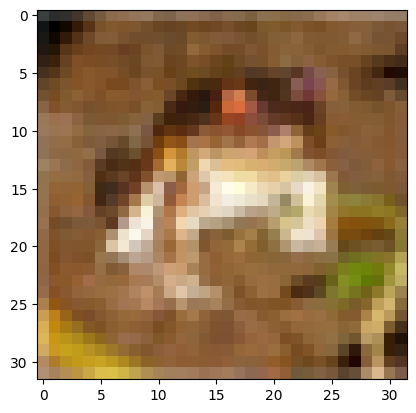

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(train_images[0])
plt.show

The resolution of 32x32 is really small so we have somme difficulties to guess what is on this image.

Let's verify with the label

In [ ]:
train_labels[0]

array([6], dtype=uint8)

We obtained 6.

But what represents 6 ?

From the website of the dataset CIFAR-10 (https://www.cs.toronto.edu/~kriz/cifar.html)

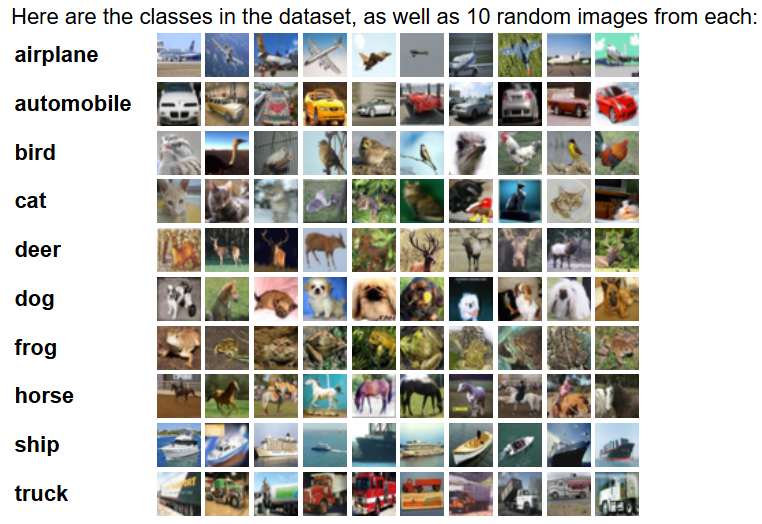

We can see that:


0.   airplane
1.   automobile
2. bird
3. cat
4. deer
5. dog
6. frog
7. horse
8. ship
9. truck

So the 6 of our image represent a frog.


  Let's display the 5 first iamges

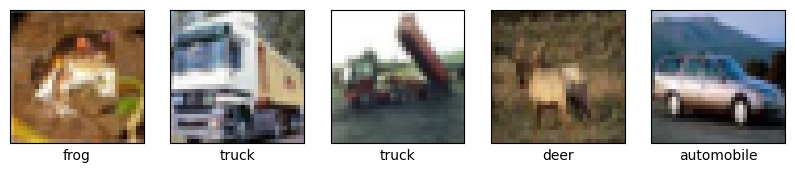

In [ ]:
# prompt: affiche les 5 premières train_images

import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

(train_images, train_labels), (test_images, test_labels) = keras.datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']


plt.figure(figsize=(10,10))
for i in range(5):
    plt.subplot(1,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    # The CIFAR labels happen to be arrays,
    # which is why you need the extra index
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

# **EDA**

Distribution of the class in the training and test set

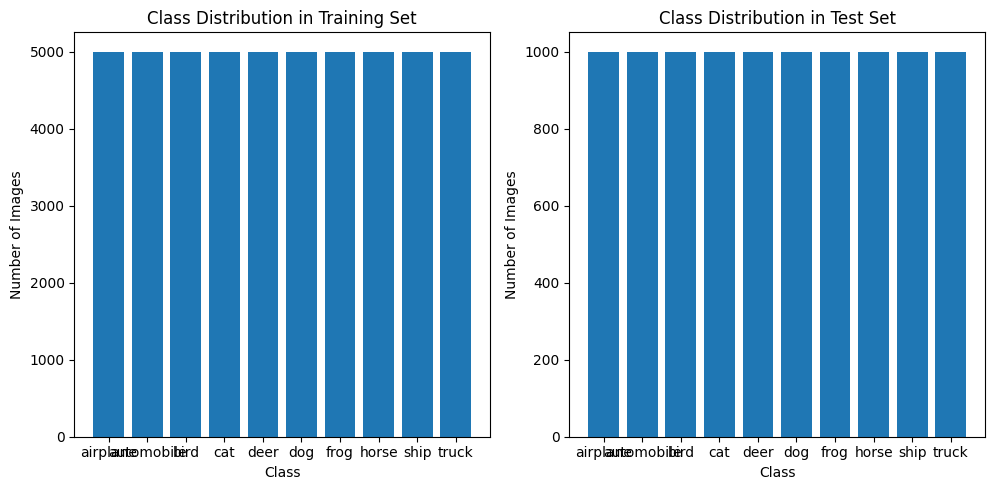

In [ ]:
# prompt: Affiche dans le meme subplot Class distribution in all the different set

import matplotlib.pyplot as plt
import numpy as np


class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

# Class distribution in all sets
def plot_class_distribution(labels, title):
    unique, counts = np.unique(labels, return_counts=True)
    class_counts = dict(zip(unique, counts))
    plt.bar(class_names, [class_counts[i] for i in range(10)])
    plt.xlabel("Class")
    plt.ylabel("Number of Images")
    plt.title(title)

plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plot_class_distribution(train_labels, "Class Distribution in Training Set")

plt.subplot(1, 3, 2)
plot_class_distribution(test_labels, "Class Distribution in Test Set")

plt.tight_layout()
plt.show()

Average pixel value per class

Training data shape: (50000, 32, 32, 3)
Training labels shape: (50000, 1)
Testing data shape: (10000, 32, 32, 3)
Testing labels shape: (10000, 1)


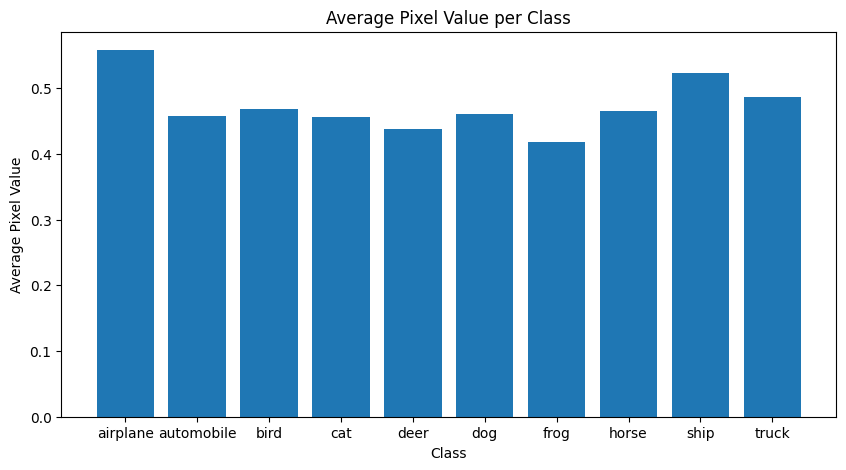

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Display some statistics about the dataset
print("Training data shape:", train_images.shape)
print("Training labels shape:", train_labels.shape)
print("Testing data shape:", test_images.shape)
print("Testing labels shape:", test_labels.shape)

class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']


# Example: Explore image properties
# Calculate the average pixel value for each class
average_pixel_values = []
for class_index in range(10):
  class_images = train_images[train_labels[:,0] == class_index]
  average_pixel_value = np.mean(class_images)
  average_pixel_values.append(average_pixel_value)


plt.figure(figsize=(10, 5))
plt.bar(class_names, average_pixel_values)
plt.xlabel("Class")
plt.ylabel("Average Pixel Value")
plt.title("Average Pixel Value per Class")
plt.show()



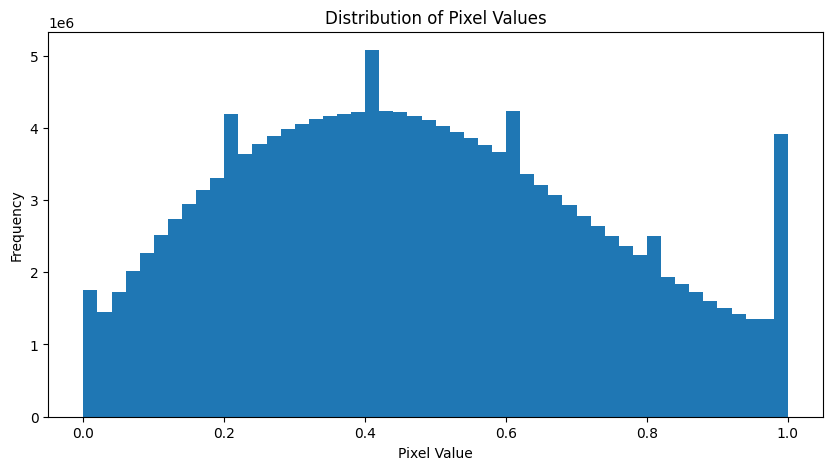

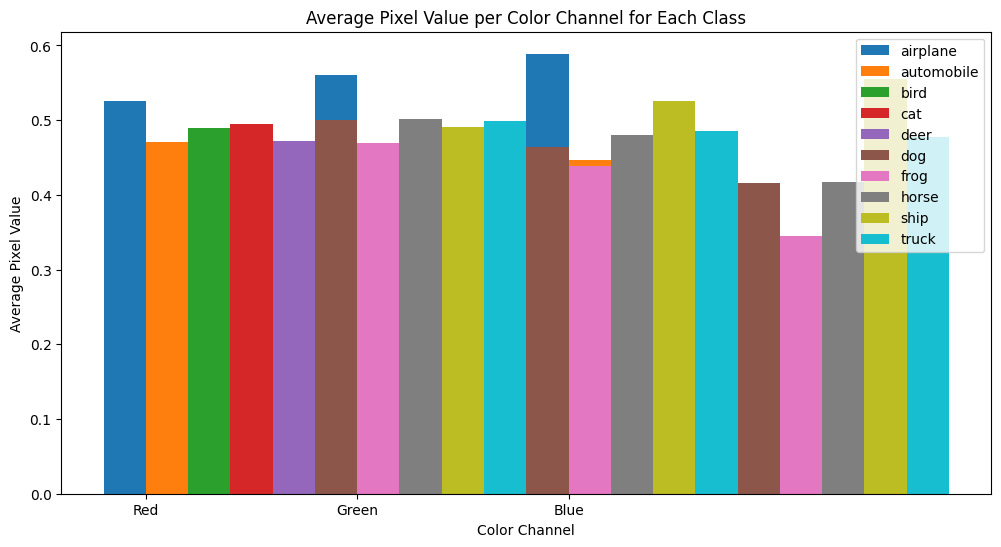

In [ ]:
# prompt: add more EDA plots

import matplotlib.pyplot as plt
import numpy as np

# Histogram of pixel values
plt.figure(figsize=(10, 5))
plt.hist(train_images.flatten(), bins=50)
plt.xlabel("Pixel Value")
plt.ylabel("Frequency")
plt.title("Distribution of Pixel Values")
plt.show()


# Example: Explore image properties (more detailed)
# Calculate the average pixel value for each color channel for each class
average_pixel_values_rgb = []
for class_index in range(10):
    class_images = train_images[train_labels[:, 0] == class_index]
    avg_r = np.mean(class_images[:, :, :, 0])
    avg_g = np.mean(class_images[:, :, :, 1])
    avg_b = np.mean(class_images[:, :, :, 2])
    average_pixel_values_rgb.append([avg_r, avg_g, avg_b])

plt.figure(figsize=(12, 6))
for i in range(10):
    plt.bar(np.arange(3) + i * 0.2, average_pixel_values_rgb[i], width=0.2, label=class_names[i])
plt.xticks(np.arange(3) + 0.1, ['Red', 'Green', 'Blue'])
plt.xlabel("Color Channel")
plt.ylabel("Average Pixel Value")
plt.title("Average Pixel Value per Color Channel for Each Class")
plt.legend(loc='upper right')
plt.show()

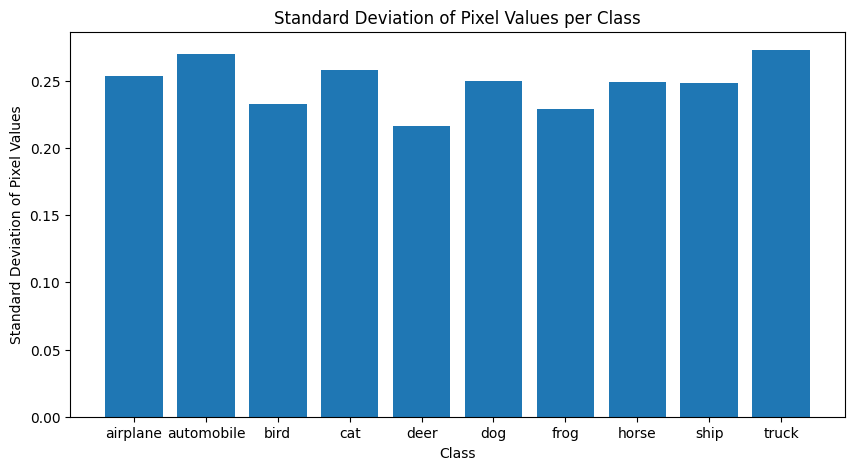

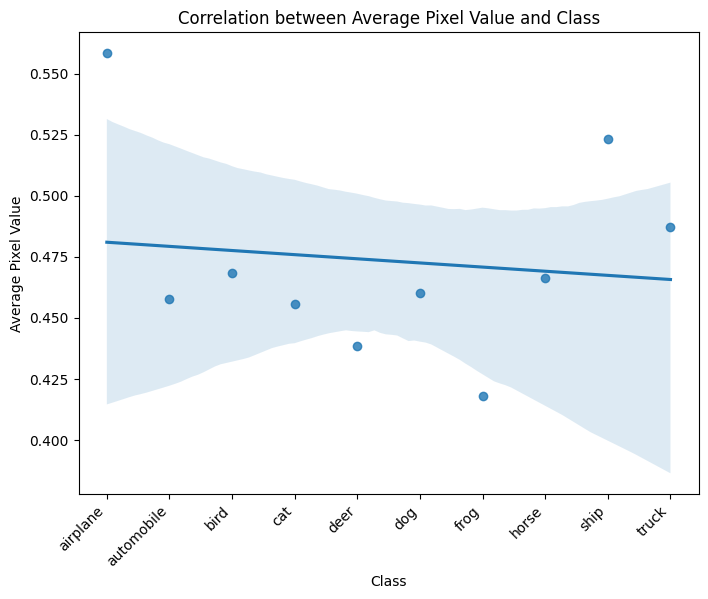

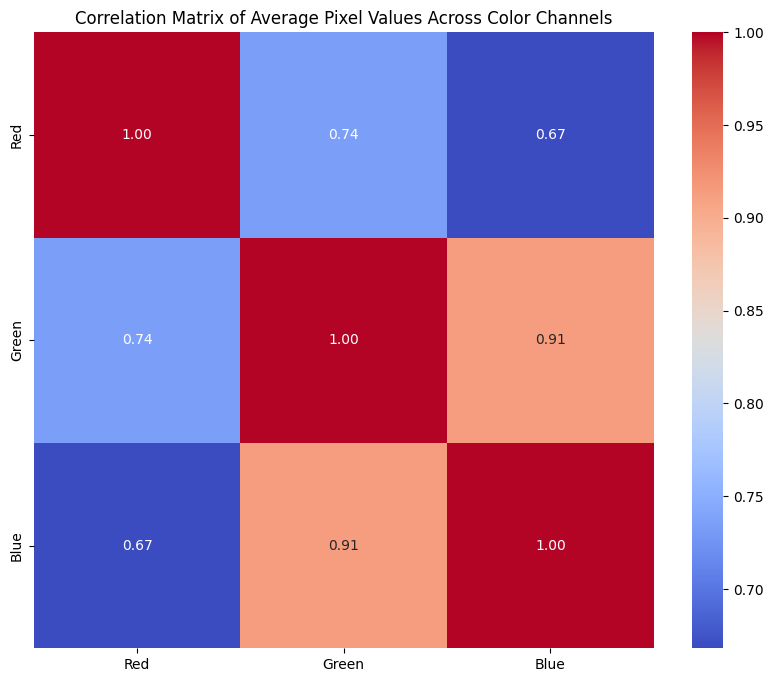

In [ ]:

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# ... (Your existing code) ...

# Calculate and visualize the standard deviation of pixel values for each class
std_dev_pixel_values = []
for class_index in range(10):
    class_images = train_images[train_labels[:, 0] == class_index]
    std_dev_pixel_value = np.std(class_images)
    std_dev_pixel_values.append(std_dev_pixel_value)

plt.figure(figsize=(10, 5))
plt.bar(class_names, std_dev_pixel_values)
plt.xlabel("Class")
plt.ylabel("Standard Deviation of Pixel Values")
plt.title("Standard Deviation of Pixel Values per Class")
plt.show()


# Explore the correlation between average pixel values and class labels
df_pixel_values = pd.DataFrame({'class': class_names, 'avg_pixel': average_pixel_values})
# Convert 'class' column to numerical representation using pd.factorize
df_pixel_values['class_num'] = pd.factorize(df_pixel_values['class'])[0]

plt.figure(figsize=(8, 6))
# Use the new numerical column 'class_num' for the x-axis
sns.regplot(x='class_num', y='avg_pixel', data=df_pixel_values, marker='o')
plt.xlabel("Class")
plt.ylabel("Average Pixel Value")
plt.title("Correlation between Average Pixel Value and Class")
# Set x-axis ticks to original class names for better readability
plt.xticks(df_pixel_values['class_num'], df_pixel_values['class'], rotation=45, ha='right')
plt.show()

# Create a correlation matrix of pixel values across color channels for each class
correlation_matrices = []
for class_index in range(10):
    class_images = train_images[train_labels[:, 0] == class_index]
    r = np.mean(class_images[:, :, :, 0].flatten())
    g = np.mean(class_images[:, :, :, 1].flatten())
    b = np.mean(class_images[:, :, :, 2].flatten())
    correlation_matrices.append([r, g, b])


df_corr = pd.DataFrame(correlation_matrices, index=class_names, columns=['Red', 'Green', 'Blue'])
plt.figure(figsize=(10, 8))
sns.heatmap(df_corr.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix of Average Pixel Values Across Color Channels")
plt.show()

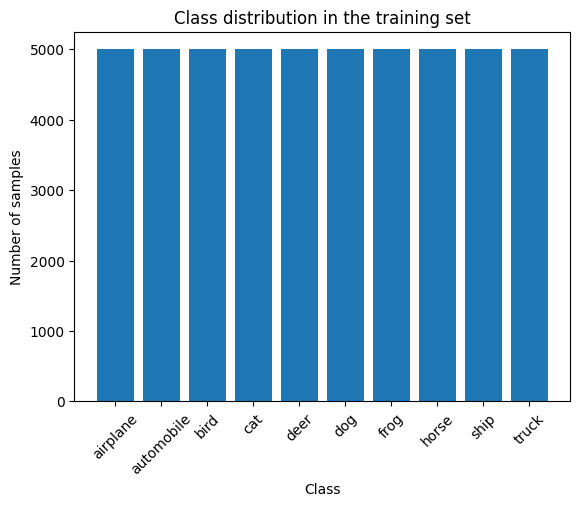

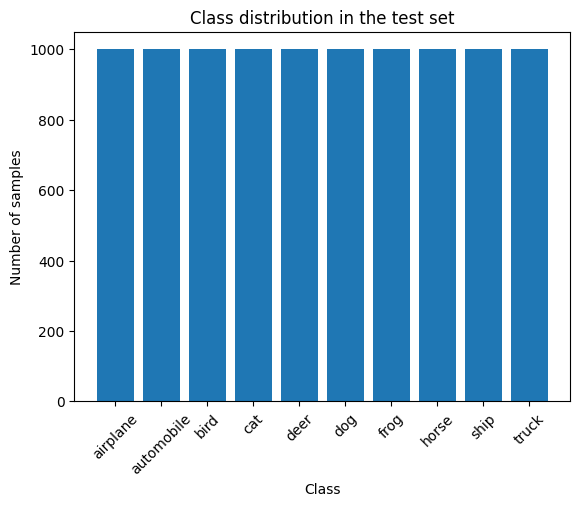

In [ ]:
# 3. Répartition des classes dans l'ensemble d'entraînement
unique, counts = np.unique(train_labels, return_counts=True)
class_distribution_train = dict(zip(class_names, counts))

# Affichage de la répartition des classes
plt.bar(class_distribution_train.keys(), class_distribution_train.values())
plt.title("Class distribution in the training set")
plt.xlabel("Class")
plt.ylabel("Number of samples")
plt.xticks(rotation=45)
plt.show()

# 4. Répartition des classes dans l'ensemble de test
unique, counts = np.unique(test_labels, return_counts=True)
class_distribution_test = dict(zip(class_names, counts))

# Affichage de la répartition des classes dans l'ensemble de test
plt.bar(class_distribution_test.keys(), class_distribution_test.values())
plt.title("Class distribution in the test set")
plt.xlabel("Class")
plt.ylabel("Number of samples")
plt.xticks(rotation=45)
plt.show()

# Data preparation

**Null values ?**

In [ ]:
# prompt: vérifie si il ya des valeurs null dans les datas ou s'il ya des doublons sachant que les datas sont des matrices

import numpy as np

def check_data_quality(data):
  """
  Checks a NumPy array (matrix) for null values (NaN) and duplicates.

  Args:
    data: A NumPy array.

  Returns:
    A dictionary containing:
      - 'has_nulls': True if null values are present, False otherwise.
      - 'null_indices': Indices of rows containing null values (if any).
  """
  results = {}
  results['has_nulls'] = np.isnan(data).any()
  if results['has_nulls']:
      results['null_indices'] = np.where(np.isnan(data))
  else:
      results['null_indices'] = []


  return results

train_images, train_labels
test_images, test_labels

print('train images:',check_data_quality(train_images))
print('train labels:',check_data_quality(train_labels))
print('test images',check_data_quality(test_images))
print('test labels',check_data_quality(test_labels))

train images: {'has_nulls': False, 'null_indices': []}
train labels: {'has_nulls': False, 'null_indices': []}
test images {'has_nulls': False, 'null_indices': []}
test labels {'has_nulls': False, 'null_indices': []}


**We will check our data to see if we need to normalize them**

In [ ]:
import numpy as np

try:
    print("Min value in images_train:", np.min(train_images))
    print("Max value in images_train:", np.max(train_images))
except NameError:
    print("The variable 'images_train' is not defined. Please define it before running this code.")



Min value in images_train: 0.0
Max value in images_train: 1.0


As we can see here the value of the colors of the RGB are from 0 to 255.

Unfortunately, we prefer to have value from 0 to 1 to use our model. Therefore, we need to normalize.

However, the first layer of our model we do that so let's start our CNN model



We will create the function f1 score because this is the only one that js not directly available in the library.

To do that we will use the precision and recall of the library and this formula :

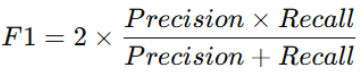

In [ ]:
"""
import tensorflow as tf
from tensorflow.keras.metrics import Precision, Recall

def f1_score(y_true, y_pred):
    precision = Precision()
    recall = Recall()

    # Convert y_true to one-hot encoding to match y_pred shape
    y_true = tf.one_hot(tf.cast(y_true, tf.int32), depth=10) # Changed line
    y_true = tf.reshape(y_true, [-1,10])  #Changed line
    y_pred = tf.reshape(y_pred, [-1,10])  #Changed line

    p = precision(y_true, y_pred)
    r = recall(y_true, y_pred)

    # Ensure p + r is not 0 before division
    f1 = tf.cond(tf.equal(p + r, 0), lambda: 0.0, lambda: 2 * (p * r) / (p + r + tf.keras.backend.epsilon()))

    return f1
"""

'\nimport tensorflow as tf\nfrom tensorflow.keras.metrics import Precision, Recall\n\ndef f1_score(y_true, y_pred):\n    precision = Precision()\n    recall = Recall()\n\n    # Convert y_true to one-hot encoding to match y_pred shape\n    y_true = tf.one_hot(tf.cast(y_true, tf.int32), depth=10) # Changed line\n    y_true = tf.reshape(y_true, [-1,10])  #Changed line\n    y_pred = tf.reshape(y_pred, [-1,10])  #Changed line\n\n    p = precision(y_true, y_pred)\n    r = recall(y_true, y_pred)\n\n    # Ensure p + r is not 0 before division\n    f1 = tf.cond(tf.equal(p + r, 0), lambda: 0.0, lambda: 2 * (p * r) / (p + r + tf.keras.backend.epsilon()))\n\n    return f1\n'

In [ ]:
import tensorflow as tf
from tensorflow import keras

(train_images, train_labels), (test_images, test_labels) = keras.datasets.cifar10.load_data()

print("train images shape : ",train_images.shape)
print("train labels shape : ",train_labels.shape)
print("test images shape : ",test_images.shape)
print("test labels shape : ",test_labels.shape)

train images shape :  (50000, 32, 32, 3)
train labels shape :  (50000, 1)
test images shape :  (10000, 32, 32, 3)
test labels shape :  (10000, 1)


In [ ]:
from tensorflow.keras.metrics import Precision, Recall

model = keras.Sequential([
    keras.Input(shape=(32,32,3)),
    keras.layers.Rescaling(1./255), #To normalize between 0 and 1

    #Convolutional part
    keras.layers.Conv2D(filters=16, kernel_size=(3,3), activation='relu'),
    keras.layers.MaxPooling2D(pool_size=(2,2), strides=(2,2)),
    keras.layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu'),
    keras.layers.MaxPooling2D(pool_size=(2,2), strides=(2,2)),
    keras.layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    keras.layers.MaxPooling2D(pool_size=(2,2), strides=(2,2))

    #fully connected part
    ,keras.layers.Flatten()
    ,keras.layers.Dense(units=256, activation='relu') #256 neurones
    ,keras.layers.Dense(units=10, activation='softmax') # output layer of 10 units

    #use softmax because multicalss problem with unique label

        ])
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()



Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ rescaling_4 (Rescaling)              │ (None, 32, 32, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_12 (Conv2D)                   │ (None, 30, 30, 16)          │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_12 (MaxPooling2D)      │ (None, 15, 15, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_13 (Conv2D)                   │ (None, 13, 13, 32)          │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_13 (MaxPooling2D)      │ (None, 6, 6, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_14 (Conv2D)                   │ (None, 4, 4, 64)            │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_14 (MaxPooling2D)      │ (None, 2, 2, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_4 (Flatten)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 256)                 │          65,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 10)                  │           2,570 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 91,946 (359.16 KB)

 Trainable params: 91,946 (359.16 KB)

 Non-trainable params: 0 (0.00 B)

To prevent overfitting the model will stop the training thanks to this callback.

In [ ]:
callbacks= [ keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)]
history = model.fit(train_images, train_labels, epochs=50, validation_split=0.2, callbacks=callbacks)

Epoch 1/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 44s 34ms/step - accuracy: 0.3296 - loss: 1.8169 - val_accuracy: 0.4775 - val_loss: 1.4435
Epoch 2/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 39s 32ms/step - accuracy: 0.5231 - loss: 1.3235 - val_accuracy: 0.5731 - val_loss: 1.2098
Epoch 3/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 40s 32ms/step - accuracy: 0.5998 - loss: 1.1331 - val_accuracy: 0.6215 - val_loss: 1.0841
Epoch 4/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 43s 34ms/step - accuracy: 0.6343 - loss: 1.0320 - val_accuracy: 0.6394 - val_loss: 1.0325
Epoch 5/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 79s 31ms/step - accuracy: 0.6709 - loss: 0.9392 - val_accuracy: 0.6415 - val_loss: 1.0326
Epoch 6/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 42s 32ms/step - accuracy: 0.6895 - loss: 0.8785 - val_accuracy: 0.6579 - val_loss: 0.9998
Epoch 7/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 43s 34ms/step - accuracy: 0.7109 - loss: 0.8094 - val_accuracy: 0.6615 - val_loss: 0.9754
Epoch 8/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 40s 32ms/step - accuracy: 0.7295 -

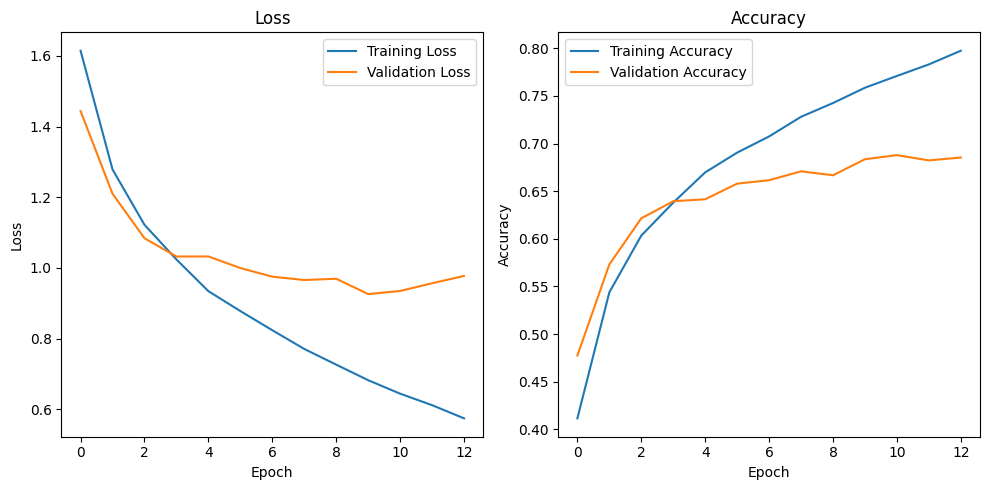

In [ ]:
# prompt: plot the loss and accuracy

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss')

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy')

plt.tight_layout()
plt.show()

**Evaluate the model**

In [ ]:
# prompt: Evaluate the model

test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_acc}")


313/313 - 3s - 9ms/step - accuracy: 0.6805 - loss: 0.9373
Test Loss: 0.9372895359992981
Test Accuracy: 0.6804999709129333


# **WIth dropout**

The point of Dropout is ti fight overfitting by disabling certain neurons to make them less reliant on one each other and generalize better




In [ ]:
model2 = keras.Sequential([
    keras.Input(shape=(32,32,3)),
    keras.layers.Rescaling(1./255), #To normalize between 0 and 1

    #Convolutional part
    keras.layers.Conv2D(filters=16, kernel_size=(3,3), activation='relu'),
    keras.layers.MaxPooling2D(pool_size=(2,2), strides=(2,2)),
    keras.layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu'),
    keras.layers.MaxPooling2D(pool_size=(2,2), strides=(2,2)),
    keras.layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    keras.layers.MaxPooling2D(pool_size=(2,2), strides=(2,2))

    #fully connected part
    ,keras.layers.Flatten()
    ,keras.layers.Dropout(rate=0.3)
    ,keras.layers.Dense(units=256, activation='relu') #256 neurones
    ,keras.layers.Dropout(rate=0.3)
    ,keras.layers.Dense(units=10, activation='softmax') # output layer of 10 units

    #use softmax because multicalss problem with unique label

        ])
model2.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model2.summary()



Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ rescaling_5 (Rescaling)              │ (None, 32, 32, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_15 (Conv2D)                   │ (None, 30, 30, 16)          │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_15 (MaxPooling2D)      │ (None, 15, 15, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_16 (Conv2D)                   │ (None, 13, 13, 32)          │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_16 (MaxPooling2D)      │ (None, 6, 6, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_17 (Conv2D)                   │ (None, 4, 4, 64)            │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_17 (MaxPooling2D)      │ (None, 2, 2, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_5 (Flatten)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 256)                 │          65,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 10)                  │           2,570 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 91,946 (359.16 KB)

 Trainable params: 91,946 (359.16 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
from os import path
callbacks2= [ keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)]
history2 = model2.fit(train_images, train_labels, epochs=50, validation_split=0.2, callbacks=callbacks)

Epoch 1/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 44s 33ms/step - accuracy: 0.2941 - loss: 1.8888 - val_accuracy: 0.4648 - val_loss: 1.4508
Epoch 2/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 38s 31ms/step - accuracy: 0.4899 - loss: 1.4015 - val_accuracy: 0.5599 - val_loss: 1.2326
Epoch 3/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 41s 31ms/step - accuracy: 0.5480 - loss: 1.2514 - val_accuracy: 0.6060 - val_loss: 1.1134


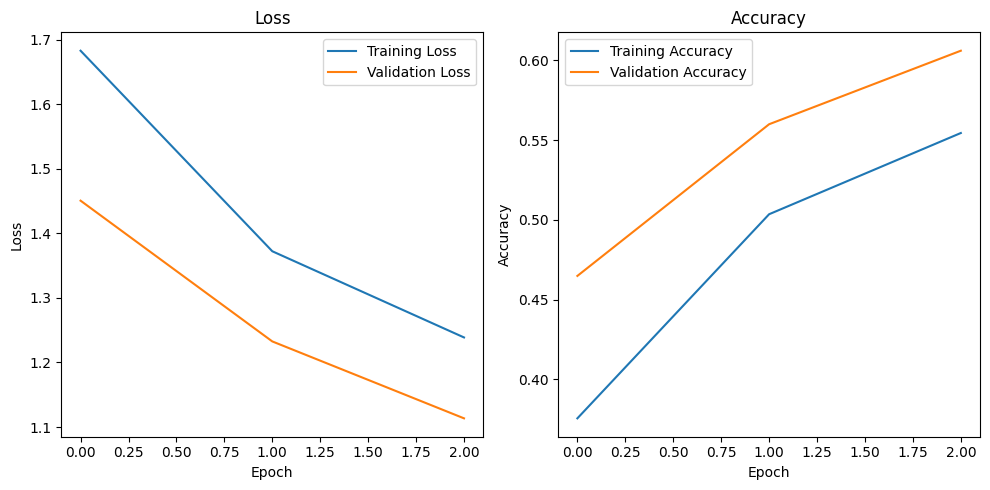

In [ ]:
# prompt: plot the loss and accuracy

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(history2.history['loss'], label='Training Loss')
plt.plot(history2.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss')

plt.subplot(1, 2, 2)
plt.plot(history2.history['accuracy'], label='Training Accuracy')
plt.plot(history2.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy')

plt.tight_layout()
plt.show()

In [ ]:
test_loss, test_acc = model2.evaluate(test_images, test_labels, verbose=2)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_acc}")

313/313 - 3s - 9ms/step - accuracy: 0.4711 - loss: 1.4372
Test Loss: 1.43716299533844
Test Accuracy: 0.47110000252723694


**Comments :**

It seems there is an issue, as the training only ran for 2 epochs. This is likely due to the accuracy not improving sufficiently, causing the training to stop prematurely because of the callback mechanism

So I increase the patience parameter in this notebook : "TensorFlow DL CNN Cifar-10_bis.ipynb" and I got much better results

# **Impact of the number of neurons in the layer**

We decided to increase the number of neurons in the convolutionnal part without adding layer

In [ ]:
model3 = keras.Sequential([
    keras.Input(shape=(32,32,3)),
    keras.layers.Rescaling(1./255), #To normalize between 0 and 1

    #Convolutional part
    keras.layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu'),
    keras.layers.MaxPooling2D(pool_size=(2,2), strides=(2,2)),
    keras.layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    keras.layers.MaxPooling2D(pool_size=(2,2), strides=(2,2)),
    keras.layers.Conv2D(filters=128, kernel_size=(3,3), activation='relu'),
    keras.layers.MaxPooling2D(pool_size=(2,2), strides=(2,2))

    #fully connected part
    ,keras.layers.Flatten()
    ,keras.layers.Dropout(rate=0.3)
    ,keras.layers.Dense(units=256, activation='relu') #256 neurones
    ,keras.layers.Dropout(rate=0.3)
    ,keras.layers.Dense(units=10, activation='softmax') # output layer of 10 units

    #use softmax because multicalss problem with unique label

        ])
model3.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model3.summary()



Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ rescaling_6 (Rescaling)              │ (None, 32, 32, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_18 (Conv2D)                   │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_18 (MaxPooling2D)      │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_19 (Conv2D)                   │ (None, 13, 13, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_19 (MaxPooling2D)      │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_20 (Conv2D)                   │ (None, 4, 4, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_20 (MaxPooling2D)      │ (None, 2, 2, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_6 (Flatten)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 10)                  │           2,570 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 227,146 (887.29 KB)

 Trainable params: 227,146 (887.29 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
callbacks= [ keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True)]
history3 = model3.fit(train_images, train_labels, epochs=50, validation_split=0.2, callbacks=callbacks)

Epoch 1/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 71s 56ms/step - accuracy: 0.3010 - loss: 1.8566 - val_accuracy: 0.5251 - val_loss: 1.3217
Epoch 2/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 72s 57ms/step - accuracy: 0.5326 - loss: 1.3061 - val_accuracy: 0.6001 - val_loss: 1.1231
Epoch 3/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 69s 56ms/step - accuracy: 0.5946 - loss: 1.1399 - val_accuracy: 0.6561 - val_loss: 0.9881
Epoch 4/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 84s 57ms/step - accuracy: 0.6357 - loss: 1.0318 - val_accuracy: 0.6642 - val_loss: 0.9534
Epoch 5/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 79s 55ms/step - accuracy: 0.6709 - loss: 0.9403 - val_accuracy: 0.6948 - val_loss: 0.8858
Epoch 6/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 70s 56ms/step - accuracy: 0.6842 - loss: 0.8945 - val_accuracy: 0.7000 - val_loss: 0.8597
Epoch 7/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 79s 54ms/step - accuracy: 0.7063 - loss: 0.8374 - val_accuracy: 0.6997 - val_loss: 0.8472
Epoch 8/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 68s 54ms/step - accuracy: 0.7206 -

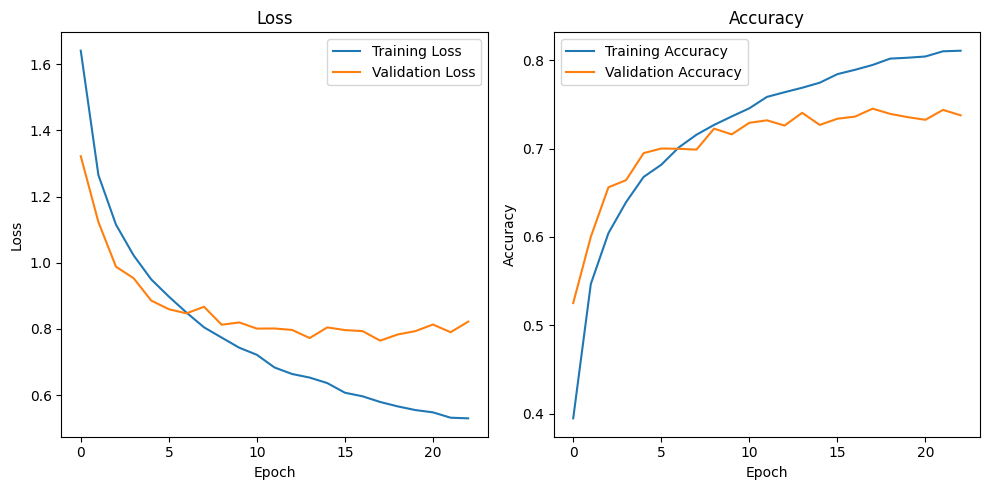

In [ ]:
# prompt: plot the loss and accuracy

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(history3.history['loss'], label='Training Loss')
plt.plot(history3.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss')

plt.subplot(1, 2, 2)
plt.plot(history3.history['accuracy'], label='Training Accuracy')
plt.plot(history3.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy')

plt.tight_layout()
plt.show()

In [ ]:
test_loss, test_acc = model3.evaluate(test_images, test_labels, verbose=2)
print('\nTest accuracy:', test_acc)
print('Test loss:', test_loss)

313/313 - 7s - 21ms/step - accuracy: 0.7389 - loss: 0.7811

Test accuracy: 0.7389000058174133
Test loss: 0.781080961227417


**Let's try to play with some parameter :**

I added padding='same' to all the Conv2D layers. This means that the output size of the convolution layers is the same as the input size (before max pooling). The advantage of using padding='same' is that it helps preserve the spatial dimensions of the input image through each convolution, preventing the image from shrinking as it passes through the network.

The use of padding='same' results in the feature map sizes staying the same after convolutions, allowing the model to preserve more spatial information at each layer.

This can be useful when you want to ensure that each layer retains more spatial information, which might help in more detailed image classification tasks, where every pixel or local region matters.

In [ ]:
model4 = keras.Sequential([
    keras.Input(shape=(32,32,3)),
    keras.layers.Rescaling(1./255), # Normalisation des données

    # Partie Convolutionnelle
    keras.layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', padding='same'),
    keras.layers.MaxPooling2D(pool_size=(2,2), strides=(2,2)),

    keras.layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu', padding='same'),
    keras.layers.MaxPooling2D(pool_size=(2,2), strides=(2,2)),

    keras.layers.Conv2D(filters=128, kernel_size=(3,3), activation='relu', padding='same'),
    keras.layers.MaxPooling2D(pool_size=(2,2), strides=(2,2)),

    # Partie Fully connected
    keras.layers.Flatten(),
    keras.layers.Dropout(rate=0.3),
    keras.layers.Dense(units=256, activation='relu'), # Couche Dense avec 256 neurones
    keras.layers.Dropout(rate=0.3),
    keras.layers.Dense(units=10, activation='softmax')  # Couche de sortie avec 10 unités

])

model4.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model4.summary()


Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ rescaling_7 (Rescaling)              │ (None, 32, 32, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_21 (Conv2D)                   │ (None, 32, 32, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_21 (MaxPooling2D)      │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_22 (Conv2D)                   │ (None, 16, 16, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_22 (MaxPooling2D)      │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_23 (Conv2D)                   │ (None, 8, 8, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_23 (MaxPooling2D)      │ (None, 4, 4, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_7 (Flatten)                  │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 256)                 │         524,544 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 10)                  │           2,570 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 620,362 (2.37 MB)

 Trainable params: 620,362 (2.37 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history4 = model4.fit(train_images, train_labels, epochs=50, validation_split=0.2, callbacks=callbacks)

Epoch 1/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 129s 101ms/step - accuracy: 0.3398 - loss: 1.7873 - val_accuracy: 0.5738 - val_loss: 1.1909
Epoch 2/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 124s 99ms/step - accuracy: 0.5641 - loss: 1.2177 - val_accuracy: 0.6469 - val_loss: 0.9992
Epoch 3/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 125s 100ms/step - accuracy: 0.6441 - loss: 1.0225 - val_accuracy: 0.6897 - val_loss: 0.8975
Epoch 4/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 142s 100ms/step - accuracy: 0.6789 - loss: 0.9033 - val_accuracy: 0.7112 - val_loss: 0.8332
Epoch 5/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 143s 101ms/step - accuracy: 0.7123 - loss: 0.8078 - val_accuracy: 0.7228 - val_loss: 0.7982


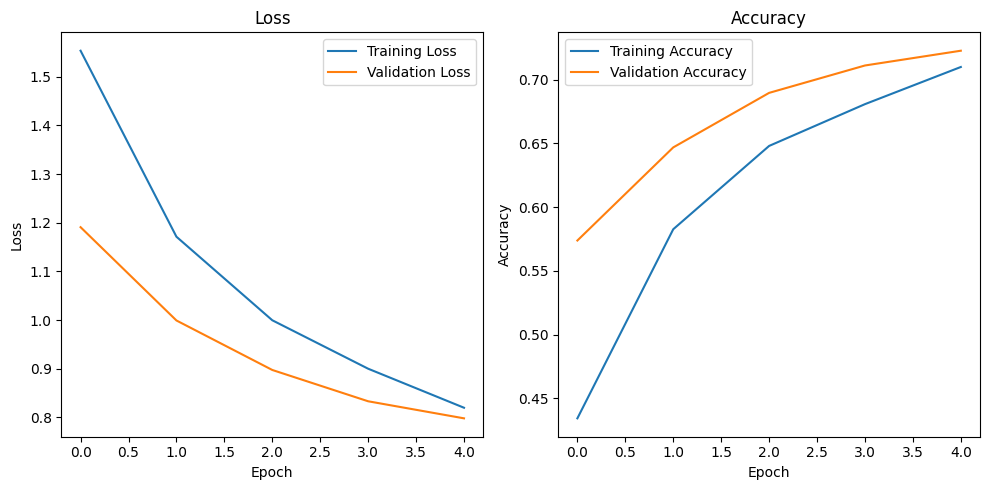

In [ ]:
# prompt: plot the loss and accuracy

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(history4.history['loss'], label='Training Loss')
plt.plot(history4.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss')

plt.subplot(1, 2, 2)
plt.plot(history4.history['accuracy'], label='Training Accuracy')
plt.plot(history4.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy')

plt.tight_layout()
plt.show()

The results are disappointing; however, the computing time and number of epochs were lower, which suggests a trade-off between performance and efficiency.

This a bit surprising bcause the total number of parameter of the model 4 was higher than the model 3

It may be because of overfitting.

**We tried to add some dens layer**

In [ ]:
model5 = keras.Sequential([
    keras.Input(shape=(32,32,3)),
    keras.layers.Rescaling(1./255), # Normalisation des données

    # Partie Convolutionnelle
    keras.layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', padding='same'),
    keras.layers.MaxPooling2D(pool_size=(2,2), strides=(2,2)),

    keras.layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu', padding='same'),
    keras.layers.MaxPooling2D(pool_size=(2,2), strides=(2,2)),

    keras.layers.Conv2D(filters=128, kernel_size=(3,3), activation='relu', padding='same'),
    keras.layers.MaxPooling2D(pool_size=(2,2), strides=(2,2)),

    # Partie Fully connected
    keras.layers.Flatten(),
    keras.layers.Dropout(rate=0.5),
    keras.layers.Dense(units=512, activation='relu'), # Couche Dense avec 256 neurones
    keras.layers.Dropout(rate=0.5),
    keras.layers.Dense(units=512, activation='relu'), # Couche Dense avec 256 neurones
    keras.layers.Dropout(rate=0.5),
    keras.layers.Dense(units=10, activation='softmax')  # Couche de sortie avec 10 unités

])

model5.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model5.summary()

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ rescaling_8 (Rescaling)              │ (None, 32, 32, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_24 (Conv2D)                   │ (None, 32, 32, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_24 (MaxPooling2D)      │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_25 (Conv2D)                   │ (None, 16, 16, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_25 (MaxPooling2D)      │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_26 (Conv2D)                   │ (None, 8, 8, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_26 (MaxPooling2D)      │ (None, 4, 4, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_8 (Flatten)                  │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_16 (Dense)                     │ (None, 512)                 │       1,049,088 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_17 (Dense)                     │ (None, 512)                 │         262,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_8 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_18 (Dense)                     │ (None, 10)                  │           5,130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,410,122 (5.38 MB)

 Trainable params: 1,410,122 (5.38 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history5 = model5.fit(train_images, train_labels, epochs=50, validation_split=0.2, callbacks=callbacks)

Epoch 1/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 145s 114ms/step - accuracy: 0.2784 - loss: 1.9047 - val_accuracy: 0.5211 - val_loss: 1.3152
Epoch 2/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 203s 115ms/step - accuracy: 0.5088 - loss: 1.3560 - val_accuracy: 0.6039 - val_loss: 1.1253
Epoch 3/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 202s 115ms/step - accuracy: 0.5791 - loss: 1.1794 - val_accuracy: 0.6566 - val_loss: 0.9918
Epoch 4/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 201s 115ms/step - accuracy: 0.6239 - loss: 1.0639 - val_accuracy: 0.6630 - val_loss: 0.9548
Epoch 5/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 204s 117ms/step - accuracy: 0.6436 - loss: 1.0060 - val_accuracy: 0.6845 - val_loss: 0.8996


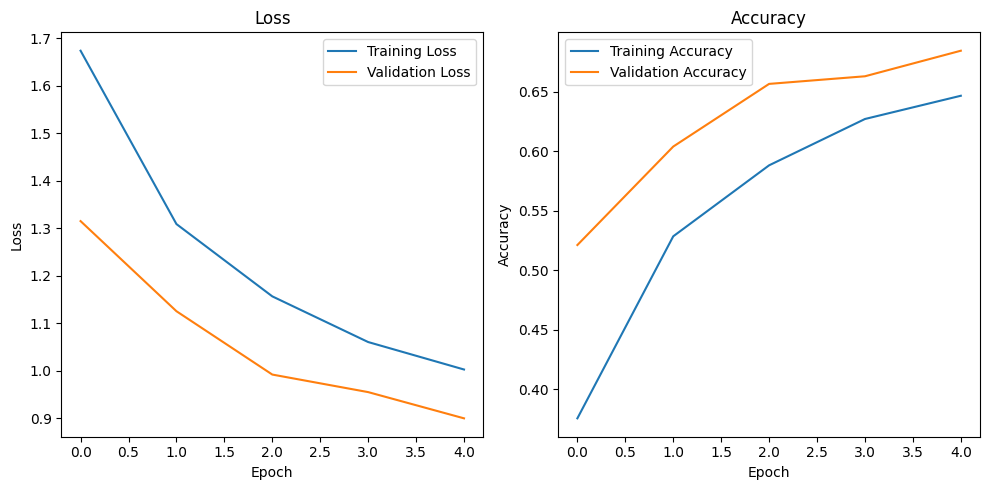

In [ ]:
# prompt: plot the loss and accuracy

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(history5.history['loss'], label='Training Loss')
plt.plot(history5.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss')

plt.subplot(1, 2, 2)
plt.plot(history5.history['accuracy'], label='Training Accuracy')
plt.plot(history5.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy')

plt.tight_layout()
plt.show()

In [ ]:
test_loss, test_acc = model5.evaluate(test_images, test_labels, verbose=2)
print('\nTest accuracy:', test_acc)
print('Test loss:', test_loss)

313/313 - 9s - 29ms/step - accuracy: 0.5208 - loss: 1.3185

Test accuracy: 0.520799994468689
Test loss: 1.3184517621994019


**Model 3 with more neurons in the dens layer**

In [ ]:
model6 = keras.Sequential([
    keras.Input(shape=(32,32,3)),
    keras.layers.Rescaling(1./255), #To normalize between 0 and 1

    #Convolutional part
    keras.layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu'),
    keras.layers.MaxPooling2D(pool_size=(2,2), strides=(2,2)),
    keras.layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    keras.layers.MaxPooling2D(pool_size=(2,2), strides=(2,2)),
    keras.layers.Conv2D(filters=128, kernel_size=(3,3), activation='relu'),
    keras.layers.MaxPooling2D(pool_size=(2,2), strides=(2,2))

    #fully connected part
    ,keras.layers.Flatten()
    ,keras.layers.Dropout(rate=0.3)
    ,keras.layers.Dense(units=512, activation='relu') #256 neurones
    ,keras.layers.Dropout(rate=0.3)
    ,keras.layers.Dense(units=10, activation='softmax') # output layer of 10 units

    #use softmax because multicalss problem with unique label

        ])
model6.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model6.summary()


Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ rescaling_9 (Rescaling)              │ (None, 32, 32, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_27 (Conv2D)                   │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_27 (MaxPooling2D)      │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_28 (Conv2D)                   │ (None, 13, 13, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_28 (MaxPooling2D)      │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_29 (Conv2D)                   │ (None, 4, 4, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_29 (MaxPooling2D)      │ (None, 2, 2, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_9 (Flatten)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_9 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_19 (Dense)                     │ (None, 512)                 │         262,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_10 (Dropout)                 │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_20 (Dense)                     │ (None, 10)                  │           5,130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 361,034 (1.38 MB)

 Trainable params: 361,034 (1.38 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
callbacks= [ keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True)]
history6 = model6.fit(train_images, train_labels, epochs=50, validation_split=0.2, callbacks=callbacks)

Epoch 1/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 84s 65ms/step - accuracy: 0.3234 - loss: 1.8133 - val_accuracy: 0.5366 - val_loss: 1.3096
Epoch 2/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 80s 64ms/step - accuracy: 0.5407 - loss: 1.2689 - val_accuracy: 0.6073 - val_loss: 1.1240
Epoch 3/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 84s 65ms/step - accuracy: 0.6130 - loss: 1.0977 - val_accuracy: 0.6472 - val_loss: 1.0142
Epoch 4/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 78s 62ms/step - accuracy: 0.6473 - loss: 0.9968 - val_accuracy: 0.6679 - val_loss: 0.9534
Epoch 5/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 86s 65ms/step - accuracy: 0.6786 - loss: 0.9132 - val_accuracy: 0.6824 - val_loss: 0.9051
Epoch 6/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 80s 64ms/step - accuracy: 0.7014 - loss: 0.8481 - val_accuracy: 0.7141 - val_loss: 0.8254
Epoch 7/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 84s 66ms/step - accuracy: 0.7240 - loss: 0.7988 - val_accuracy: 0.7074 - val_loss: 0.8375
Epoch 8/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 142s 66ms/step - accuracy: 0.7296 

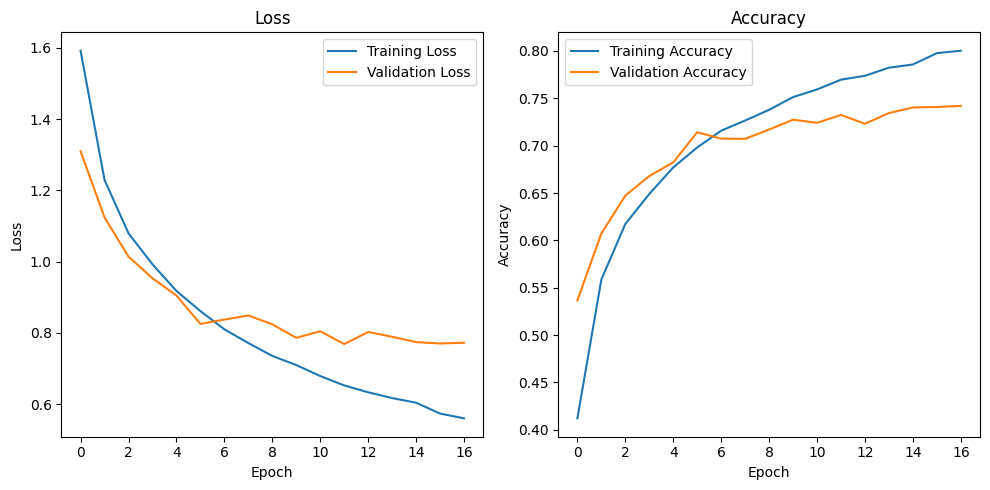

In [ ]:
# prompt: plot the loss and accuracy

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(history6.history['loss'], label='Training Loss')
plt.plot(history6.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss')

plt.subplot(1, 2, 2)
plt.plot(history6.history['accuracy'], label='Training Accuracy')
plt.plot(history6.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy')

plt.tight_layout()
plt.show()

In [ ]:
test_loss, test_acc = model6.evaluate(test_images, test_labels, verbose=2)
print('\nTest accuracy:', test_acc)
print('Test loss:', test_loss)

313/313 - 4s - 14ms/step - accuracy: 0.7299 - loss: 0.7940

Test accuracy: 0.7299000024795532
Test loss: 0.7940382957458496


**We will try to improve the model 6**

In [ ]:
from tensorflow.keras.layers import BatchNormalization, LeakyReLU
import tensorflow as tf
from tensorflow import keras

(train_images, train_labels), (test_images, test_labels) = keras.datasets.cifar10.load_data()

model6bis = keras.Sequential([
    keras.Input(shape=(32,32,3)),
    keras.layers.Rescaling(1./255),  # Normalisation des images

    # Partie convolutionnelle
    keras.layers.Conv2D(filters=32, kernel_size=(3,3)),
    BatchNormalization(),
    LeakyReLU(alpha=0.2),  # Activation LeakyReLU
    keras.layers.MaxPooling2D(pool_size=(2,2), strides=(2,2)),

    keras.layers.Conv2D(filters=64, kernel_size=(3,3)),
    BatchNormalization(),
    LeakyReLU(alpha=0.2),
    keras.layers.MaxPooling2D(pool_size=(2,2), strides=(2,2)),

    keras.layers.Conv2D(filters=128, kernel_size=(3,3)),
    BatchNormalization(),
    LeakyReLU(alpha=0.2),
    keras.layers.MaxPooling2D(pool_size=(2,2), strides=(2,2)),

    # Partie entièrement connectée
    keras.layers.Flatten(),
    keras.layers.Dropout(rate=0.3),  # Taux de dropout
    keras.layers.Dense(units=512, activation='relu'),  # 512 neurones
    keras.layers.Dropout(rate=0.3),
    keras.layers.Dense(units=10, activation='softmax')  # Couche de sortie avec 10 unités

])

# Compilation du modèle
model6bis.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Résumé du modèle
model6bis.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ rescaling_10 (Rescaling)             │ (None, 32, 32, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_30 (Conv2D)                   │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 30, 30, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu (LeakyReLU)              │ (None, 30, 30, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_30 (MaxPooling2D)      │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_31 (Conv2D)                   │ (None, 13, 13, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 13, 13, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_1 (LeakyReLU)            │ (None, 13, 13, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_31 (MaxPooling2D)      │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_32 (Conv2D)                   │ (None, 4, 4, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 4, 4, 128)           │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_2 (LeakyReLU)            │ (None, 4, 4, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_32 (MaxPooling2D)      │ (None, 2, 2, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_10 (Flatten)                 │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_11 (Dropout)                 │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_21 (Dense)                     │ (None, 512)                 │         262,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_12 (Dropout)                 │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_22 (Dense)                     │ (None, 10)                  │           5,130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 361,930 (1.38 MB)

 Trainable params: 361,482 (1.38 MB)

 Non-trainable params: 448 (1.75 KB)

In [ ]:
callbacks= [ keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True)]
history6bis = model6bis.fit(train_images, train_labels, epochs=50, validation_split=0.2, callbacks=callbacks)

Epoch 1/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 116s 90ms/step - accuracy: 0.3879 - loss: 1.7230 - val_accuracy: 0.5726 - val_loss: 1.2183
Epoch 2/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 140s 89ms/step - accuracy: 0.5781 - loss: 1.1849 - val_accuracy: 0.4629 - val_loss: 1.6592
Epoch 3/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 143s 89ms/step - accuracy: 0.6337 - loss: 1.0287 - val_accuracy: 0.5905 - val_loss: 1.1584
Epoch 4/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 140s 88ms/step - accuracy: 0.6782 - loss: 0.9176 - val_accuracy: 0.6186 - val_loss: 1.1157
Epoch 5/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 110s 88ms/step - accuracy: 0.7096 - loss: 0.8342 - val_accuracy: 0.7194 - val_loss: 0.8140
Epoch 6/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 110s 88ms/step - accuracy: 0.7322 - loss: 0.7716 - val_accuracy: 0.6585 - val_loss: 0.9797
Epoch 7/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 143s 89ms/step - accuracy: 0.7514 - loss: 0.7119 - val_accuracy: 0.6739 - val_loss: 1.0029
Epoch 8/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 144s 90ms/step - accuracy: 

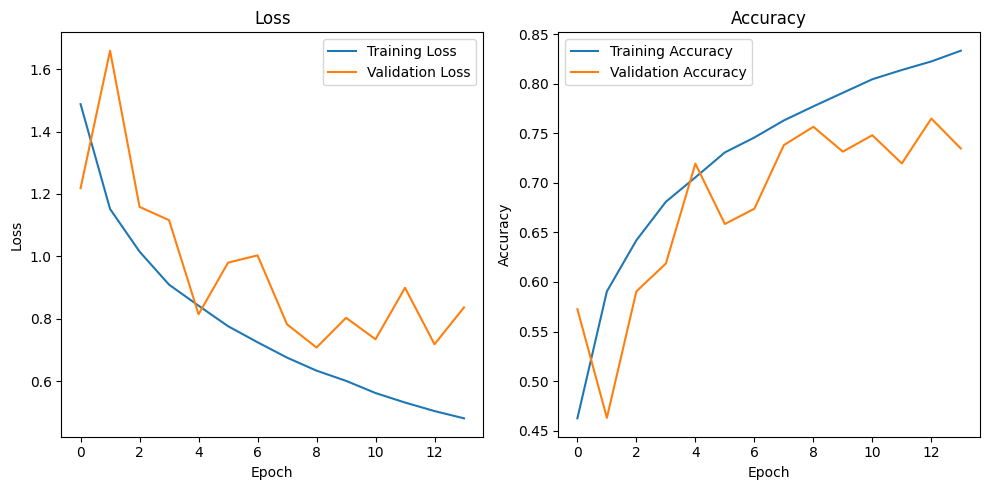

In [ ]:
# prompt: plot the loss and accuracy

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(history6bis.history['loss'], label='Training Loss')
plt.plot(history6bis.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss')

plt.subplot(1, 2, 2)
plt.plot(history6bis.history['accuracy'], label='Training Accuracy')
plt.plot(history6bis.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy')

plt.tight_layout()
plt.show()

In [ ]:
test_loss, test_acc = model6bis.evaluate(test_images, test_labels, verbose=2)
print('\nTest accuracy:', test_acc)
print('Test loss:', test_loss)

313/313 - 6s - 20ms/step - accuracy: 0.7497 - loss: 0.7214

Test accuracy: 0.7497000098228455
Test loss: 0.7214280962944031


Ajout du learning scheduler

In [ ]:
from tensorflow.keras.callbacks import LearningRateScheduler

# Définir la fonction du Learning Rate Scheduler
def lr_scheduler(epoch):
    initial_lr = 1e-3  # Valeur de départ pour le taux d'apprentissage
    if epoch < 6:
        return initial_lr
    else:
        return initial_lr * tf.math.exp(-0.1 * (epoch - 10)).numpy()  # Décrémenter le taux d'apprentissage après 10 epochs

# Création du callback LearningRateScheduler
lr_callback = LearningRateScheduler(lr_scheduler)

model6.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model6.summary()

history6l = model6.fit(train_images, train_labels, epochs=50, validation_split=0.2, callbacks=[lr_callback])

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ rescaling_9 (Rescaling)              │ (None, 32, 32, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_27 (Conv2D)                   │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_27 (MaxPooling2D)      │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_28 (Conv2D)                   │ (None, 13, 13, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_28 (MaxPooling2D)      │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_29 (Conv2D)                   │ (None, 4, 4, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_29 (MaxPooling2D)      │ (None, 2, 2, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_9 (Flatten)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_9 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_19 (Dense)                     │ (None, 512)                 │         262,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_10 (Dropout)                 │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_20 (Dense)                     │ (None, 10)                  │           5,130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 361,034 (1.38 MB)

 Trainable params: 361,034 (1.38 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 76s 59ms/step - accuracy: 0.8107 - loss: 0.5420 - val_accuracy: 0.7383 - val_loss: 0.7953 - learning_rate: 0.0010
Epoch 2/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 81s 58ms/step - accuracy: 0.8311 - loss: 0.4828 - val_accuracy: 0.7384 - val_loss: 0.7785 - learning_rate: 0.0010
Epoch 3/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 74s 59ms/step - accuracy: 0.8346 - loss: 0.4686 - val_accuracy: 0.7355 - val_loss: 0.8068 - learning_rate: 0.0010
Epoch 4/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 77s 55ms/step - accuracy: 0.8379 - loss: 0.4531 - val_accuracy: 0.7375 - val_loss: 0.8123 - learning_rate: 0.0010
Epoch 5/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 86s 58ms/step - accuracy: 0.8448 - loss: 0.4423 - val_accuracy: 0.7415 - val_loss: 0.8118 - learning_rate: 0.0010
Epoch 6/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 84s 60ms/step - accuracy: 0.8490 - loss: 0.4286 - val_accuracy: 0.7341 - val_loss: 0.8071 - learning_rate: 0.0010
Epoch 7/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 83s 61ms/step - accura

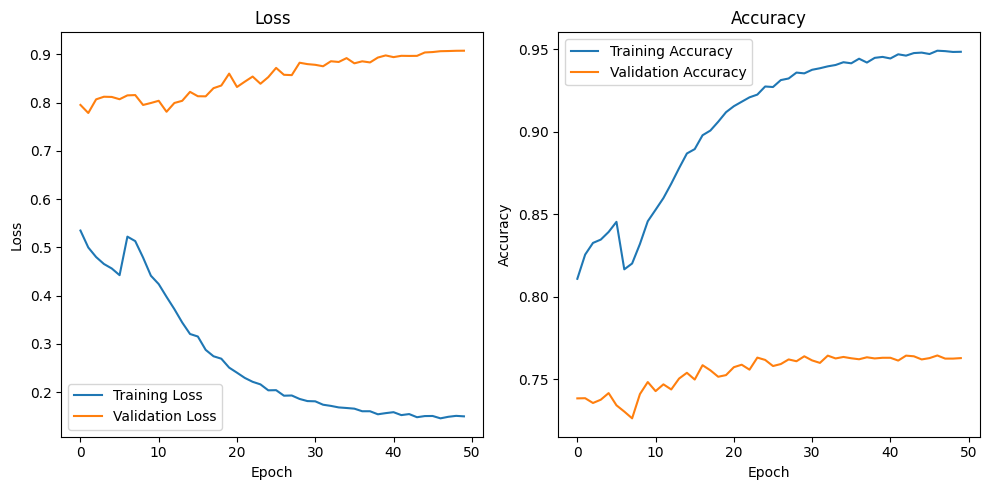

In [ ]:
# prompt: plot the loss and accuracy

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(history6l.history['loss'], label='Training Loss')
plt.plot(history6l.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss')

plt.subplot(1, 2, 2)
plt.plot(history6l.history['accuracy'], label='Training Accuracy')
plt.plot(history6l.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy')

plt.tight_layout()
plt.show()

In [ ]:
test_loss, test_acc = model6.evaluate(test_images, test_labels, verbose=2)
print('\nTest accuracy:', test_acc)
print('Test loss:', test_loss)

313/313 - 5s - 17ms/step - accuracy: 0.7583 - loss: 0.9486

Test accuracy: 0.7583000063896179
Test loss: 0.9486226439476013


# **Data Augmentation**

Data augmentation is a technique used to artificially increase the size and diversity of a training dataset by applying random transformations to the original data. These transformations can include operations like rotation, flipping, scaling, cropping, or changing the color balance of images. In the context of image processing, for example, data augmentation helps the model generalize better by exposing it to a wider variety of input variations. This is especially useful when the amount of labeled data is limited, as it allows the model to learn from more diverse examples without needing to collect more data.

In [ ]:
import tensorflow as tf
from tensorflow import keras

(train_images, train_labels), (test_images, test_labels) = keras.datasets.cifar10.load_data()

# Data augmentation
datagen = keras.preprocessing.image.ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    zoom_range=0.1
)

# Manually split data into training and validation sets
num_validation_samples = int(0.2 * len(train_images))  # 20% for validation
validation_images = train_images[:num_validation_samples]
validation_labels = train_labels[:num_validation_samples]
train_images = train_images[num_validation_samples:]
train_labels = train_labels[num_validation_samples:]

datagen.fit(train_images) # fit only on training images

# Train the model with data augmentation and validation_data
callbacks= [ keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True)]
history2 = model2.fit(
    datagen.flow(train_images, train_labels, batch_size=32),
    epochs=50,
    validation_data=(validation_images, validation_labels), # use validation_data instead of validation_split
    callbacks=callbacks
)

Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1250/1250 ━━━━━━━━━━━━━━━━━━━━ 71s 56ms/step - accuracy: 0.4882 - loss: 1.4216 - val_accuracy: 0.5264 - val_loss: 1.3143
Epoch 2/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 85s 59ms/step - accuracy: 0.5167 - loss: 1.3420 - val_accuracy: 0.6044 - val_loss: 1.1061
Epoch 3/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 73s 58ms/step - accuracy: 0.5432 - loss: 1.2828 - val_accuracy: 0.6162 - val_loss: 1.0884
Epoch 4/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 70s 56ms/step - accuracy: 0.5545 - loss: 1.2468 - val_accuracy: 0.6414 - val_loss: 1.0161
Epoch 5/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 84s 58ms/step - accuracy: 0.5691 - loss: 1.2163 - val_accuracy: 0.6561 - val_loss: 0.9856
Epoch 6/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 79s 56ms/step - accuracy: 0.5741 - loss: 1.1949 - val_accuracy: 0.6495 - val_loss: 0.9982
Epoch 7/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 72s 58ms/step - accuracy: 0.5850 - loss: 1.1679 - val_accuracy: 0.6334 - val_loss: 1.0475
Epoch 8/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 80s 56ms/step - accuracy: 0.5914 - loss: 1.15

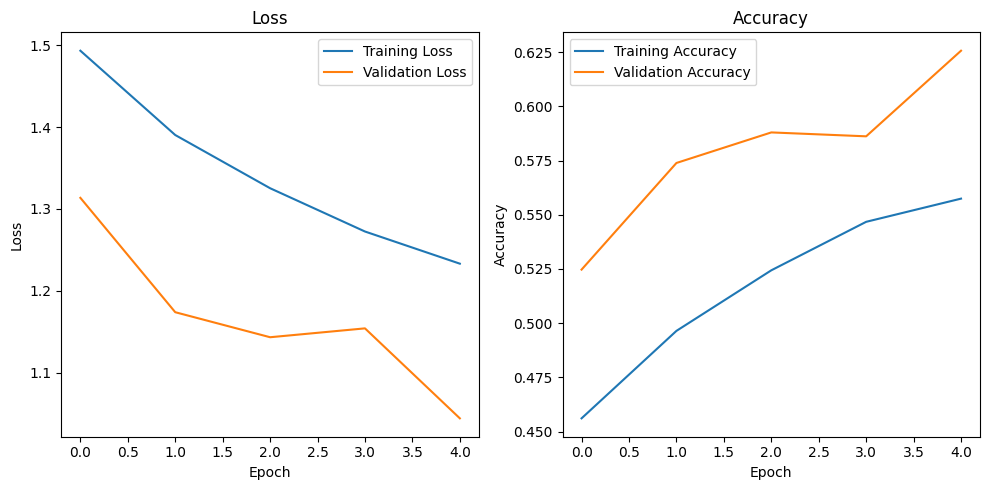

In [ ]:
# prompt: plot the loss and accuracy

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(history2.history['loss'], label='Training Loss')
plt.plot(history2.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss')

plt.subplot(1, 2, 2)
plt.plot(history2.history['accuracy'], label='Training Accuracy')
plt.plot(history2.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy')

plt.tight_layout()
plt.show()

In [ ]:
test_loss, test_acc = model2.evaluate(test_images, test_labels, verbose=2)
print('\nTest accuracy:', test_acc)
print('Test loss:', test_loss)

313/313 - 3s - 11ms/step - accuracy: 0.5214 - loss: 1.3224

Test accuracy: 0.521399974822998
Test loss: 1.3223825693130493


# Conclusion on the results

Base Model: The basic model without any additional modifications achieves a moderate performance with an accuracy of 68%. This is a decent starting point but clearly leaves room for improvement.

Dropout Layer: Adding dropout helps improve accuracy (71.1%) by preventing overfitting, though it slightly increases the loss. This indicates that regularization can enhance generalization, but careful tuning is necessary.

More Convolutional Neurons: Increasing the number of filters in the convolutional layers leads to a significant boost in both accuracy (73.9%) and reduced loss, suggesting that the model benefits from learning more complex features from the images.

Paddle: The introduction of "Paddle" caused a significant drop in performance, both in terms of loss and accuracy. This suggests that this modification did not improve the model and might have introduced unwanted complexity or overfitting.

Additional Dense Layer: Adding an extra fully connected layer resulted in a substantial decline in performance, with both higher loss and lower accuracy. This indicates that too much complexity in the fully connected layers can harm the model's ability to generalize effectively.

Increasing Neurons in Fully Connected Part: Expanding the number of neurons in the dense layers helped to slightly improve performance (72.9%), though it wasn't as impactful as changes made to the convolutional part.

Batch Size + LeakyReLU: Optimizing batch size and using LeakyReLU significantly improved accuracy (74.9%), likely helping with the vanishing gradient problem and allowing the model to learn more efficiently.

Optimizer Change (RMSprop vs Adam): Switching from Adam to RMSprop resulted in a slight decrease in performance, with a lower accuracy and higher loss. This suggests that Adam is better suited for this particular problem and architecture, as it is generally more stable and faster to converge.

Learning Rate Scheduler: The introduction of a learning rate scheduler further improved performance, increasing accuracy to 75.8%. This suggests that adjusting the learning rate dynamically during training allows the model to converge more effectively and generalize better.

Overall, regularization techniques, more convolutional filters, and learning rate adjustments were the most effective strategies to improve model performance. On the other hand, adding unnecessary complexity through additional layers or untested modifications led to poorer results. These findings suggest that a balanced architecture with regularization and careful optimization is key for achieving the best performance on the CIFAR-10 dataset.